# Working with `numpy` Vectors (Unidimensional Data)


| Name       | Student Number | Email Address            | Student Type         |
|------------|----------------|--------------------------|----------------------|
| YUPENG WEN | s224212855     | s224212855@deakin.edu.au | Postgraduate(Sit731) |


## Introduction
In this report, we analyze the `BTC-to-USD` closing prices for the third quarter of 2023 to identify outliers and unusual daily price changes. The report also serves to demonstrate the use of `NumPy` and `Python 3` syntax for data analysis. Step-by-step instructions are provided, covering data loading, data cleaning,visualization of the results, identifying extreme data and explaining the outliers.

## Loading Data
In this part, we will load data from the data set file.
1. Load the `BTC-to-USD` data for the period 2023-01-01 to 2023-12-31.
2. Use `numpy.genfromtxt` to read the above BTC-to-USD data as a numpy vector named rates.


In [1]:
import numpy as np

# preview the data
data = np.genfromtxt("data/BTC-USD-2023/BTC-USD.csv", delimiter=",", dtype=str)
data[:5]

array([['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
       ['2023-01-01', '16547.914063', '16630.439453', '16521.234375',
        '16625.080078', '16625.080078', '9244361700'],
       ['2023-01-02', '16625.509766', '16759.343750', '16572.228516',
        '16688.470703', '16688.470703', '12097775227'],
       ['2023-01-03', '16688.847656', '16760.447266', '16622.371094',
        '16679.857422', '16679.857422', '13903079207'],
       ['2023-01-04', '16680.205078', '16964.585938', '16667.763672',
        '16863.238281', '16863.238281', '18421743322']], dtype='<U12')

In [2]:
# Load only the Close column; invalid values automatically become NaN
close_float = np.genfromtxt("data/BTC-USD-2023/BTC-USD.csv", delimiter=",", skip_header=1, usecols=[4], dtype=float,
                            invalid_raise=False)
close_float[:5]

array([16625.080078, 16688.470703, 16679.857422, 16863.238281,
       16836.736328])

In [3]:
# Remove NaN values
clean_close = close_float[~np.isnan(close_float)]


In [4]:
## Export to CSV
np.savetxt("data/BTC-USD-2023/BTC_close_only.csv", clean_close, fmt="%.6f")

## Converting Data and Compute Aggregates
In this section, we filter the original dataset to extract the Q3 closing prices and then compute and display the statistical aggregates for the third quarter.

In [5]:
# load third quarter data
third_quarter = data[181:273]
third_quarter[:5]

array([['2023-06-30', '30441.353516', '31256.863281', '29600.275391',
        '30477.251953', '30477.251953', '26387306197'],
       ['2023-07-01', '30471.847656', '30641.289063', '30328.865234',
        '30590.078125', '30590.078125', '9086606733'],
       ['2023-07-02', '30587.269531', '30766.140625', '30264.019531',
        '30620.769531', '30620.769531', '10533418042'],
       ['2023-07-03', '30624.515625', '31375.613281', '30586.513672',
        '31156.439453', '31156.439453', '15271884873'],
       ['2023-07-04', '31156.865234', '31325.197266', '30659.355469',
        '30777.582031', '30777.582031', '12810828427']], dtype='<U12')

In [9]:
# q3 Close
q3_close = third_quarter[:, 4].astype(float)

# arithmetic mean
mean_q3 = np.mean(q3_close)

# minimum
min_q3 = np.min(q3_close)

# the first quartile
q1_q3 = np.percentile(q3_close, 25)

# median
median_q3 = np.median(q3_close)

# the third quartile
q3_q3 = np.percentile(q3_close, 75)

# maximum
max_q3 = np.max(q3_close)

# standard deviation
std_q3 = np.std(q3_close)

# interquartile range
iqr_q3 = q3_q3 - q1_q3

print(f"{'Metric':<25} {'Value'}")
print("-" * 40)
print(f"{'Mean':<25} {mean_q3:.2f}")
print(f"{'Minimum':<25} {min_q3:.2f}")
print(f"{'1st Quartile (Q1)':<25} {q1_q3:.2f}")
print(f"{'Median':<25} {median_q3:.2f}")
print(f"{'3rd Quartile (Q3)':<25} {q3_q3:.2f}")
print(f"{'Maximum':<25} {max_q3:.2f}")
print(f"{'Standard Deviation':<25} {std_q3:.2f}")
print(f"{'Interquartile Range (IQR)':<25} {iqr_q3:.2f}")


Metric                    Value
----------------------------------------
Mean                      28129.47
Minimum                   25162.65
1st Quartile (Q1)         26225.56
Median                    29041.99
3rd Quartile (Q3)         29776.86
Maximum                   31476.05
Standard Deviation        1839.78
Interquartile Range (IQR) 3551.30


## Visualize the Data
In this section, we will call `matplotlib.pyplot.plot` to draw the Q3 2023 data, using red solid line segments.

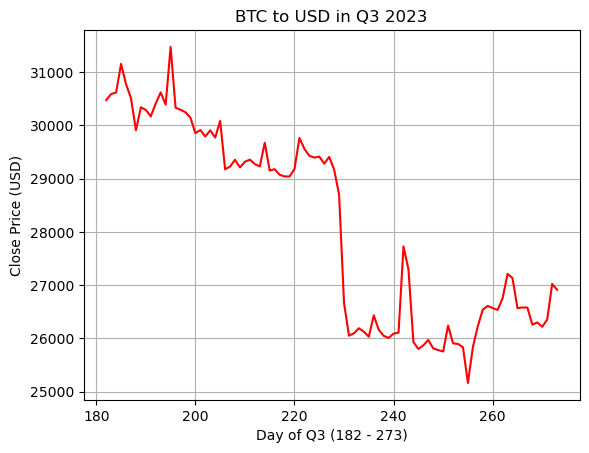

In [10]:
import matplotlib.pyplot as plt

# Days 182–273 mapped to 1–92 for easier plotting
days = np.arange(182, 181 + len(q3_close) + 1)

plt.plot(days, q3_close, 'r-')  # red solid line ('r-' means red + solid)
plt.title("BTC to USD in Q3 2023")
plt.xlabel("Day of Q3 (182 - 273)")
plt.ylabel("Close Price (USD)")
plt.grid(True)

plt.show()

To better analyze the changes in closing prices, we can plot the aggregate data.

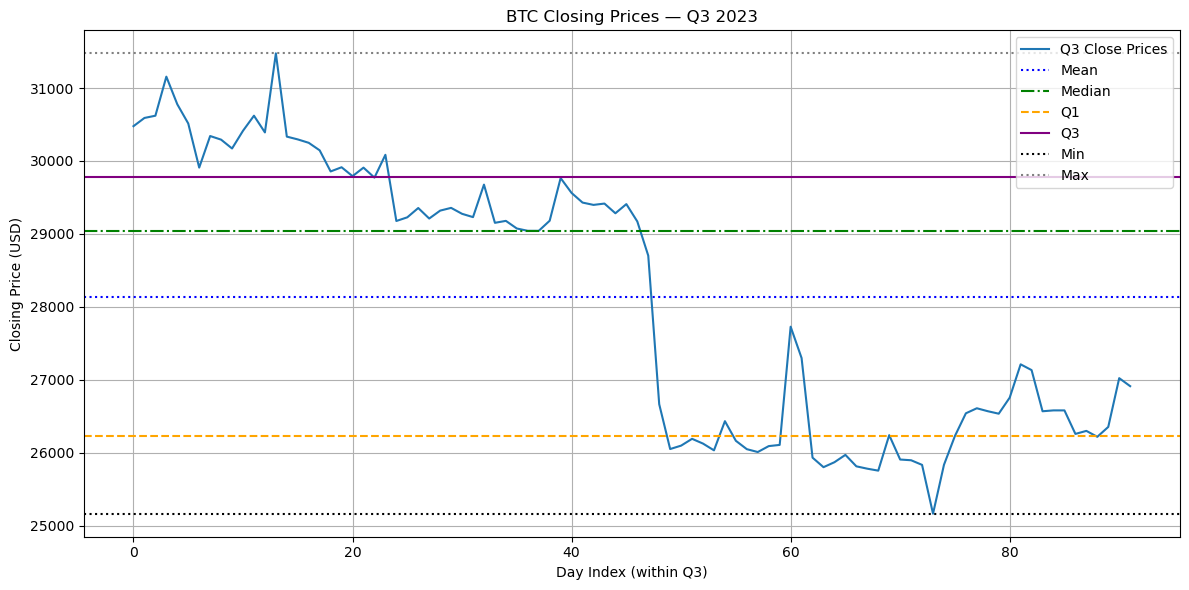

In [11]:
import matplotlib.pyplot as plt

# Create the x-axis as day numbers
days = np.arange(q3_close.size)

plt.figure(figsize=(12, 6))

# Plot the Q3 close prices
plt.plot(days, q3_close, label="Q3 Close Prices")

# Horizontal lines for aggregates
plt.axhline(mean_q3, color='blue', linestyle="dotted", label="Mean")
plt.axhline(median_q3, color='green', linestyle="dashdot", label="Median")
plt.axhline(q1_q3, color='orange', linestyle="dashed", label="Q1")
plt.axhline(q3_q3, color='purple', linestyle="-", label="Q3")
plt.axhline(min_q3, color='black', linestyle=":", label="Min")
plt.axhline(max_q3, color='gray', linestyle=":", label="Max")

plt.title("BTC Closing Prices — Q3 2023")
plt.xlabel("Day Index (within Q3)")
plt.ylabel("Closing Price (USD)")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()

**Reflection**: The plot of BTC closing prices over Q3 2023 shows how the price evolved during the third quarter. A few key observations can be made:
1. The overall trend is downward, with the price gradually declining throughout the quarter.
2. There are sharp drops in price between days 225 and 230.
3. There is a noticeable peak around day 190 and a noticeable trough around day 245.
4. Most prices appear to lie between the first quartile (Q1) and the third quartile (Q3).

## Indentify the extreme data
In this section, we will determine the day numbers with the lowest and highest observed prices in Q3 2023.

In [12]:
# Lowest price was on day 254 (25162.65).
lowest_close = np.min(q3_close)

# Highest price was on day 194 (31476.05).
highest_close = np.max(q3_close)

# Get indices of min and max prices
idx_min = np.argmin(q3_close)
idx_max = np.argmax(q3_close)

# Use these indices to get the dates from third_quarter
date_lowest = third_quarter[idx_min, 0]
date_highest = third_quarter[idx_max, 0]

# Print results
print(f"Lowest price:  {lowest_close} on {date_lowest}")
print(f"Highest price: {highest_close} on {date_highest}")

# Check results
print(f"data in Data set: {data[data[:,0]==date_lowest][:, 4].astype(float)} date on {date_lowest}")
print(f"data in Data set: {data[data[:,0]==date_highest][:, 4].astype(float)} date on {date_highest}")


Lowest price:  25162.654297 on 2023-09-11
Highest price: 31476.048828 on 2023-07-13
data in Data set: [25162.654297] date on 2023-09-11
data in Data set: [31476.048828] date on 2023-07-13


## Identify the outliers and Visualize the data
In this section, we will use `matplotlib.pyplot.boxplot`, draw a horizontal box-and-whisker plot for the Q3 2023 daily price increases/decreases as obtained by a call to `numpy.diff`.

In [13]:
# Compute daily changes
daily_changes = np.diff(q3_close)

# Compute mean of daily changes
mean_change = np.mean(daily_changes)


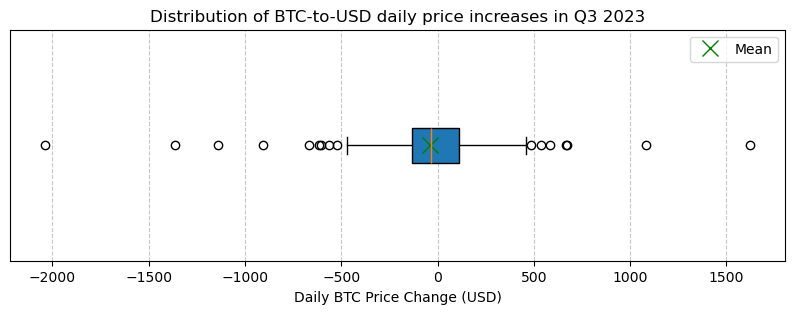

In [14]:
# Plot horizontal boxplot
plt.figure(figsize=(10, 3))

# Horizontal boxplot
plt.boxplot(daily_changes, vert=False, patch_artist=True)

# Mark the mean with a green "x"
plt.plot(mean_change, 1, 'gx', markersize=12, label='Mean')

# Labels and title
plt.xlabel("Daily BTC Price Change (USD)")
plt.yticks([])
plt.title("Distribution of BTC-to-USD daily price increases in Q3 2023")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.show()

**Reflection**: The horizontal boxplot of BTC-to-USD daily price changes in Q3 2023 shows the distribution of daily price fluctuations. Key observations include:
1. The green "x" marks the mean daily change, which is close to zero, indicating that most daily changes fluctuate around zero.
2. The whiskers represent the typical range of daily changes outside the interquartile range (IQR), while points plotted outside the whiskers correspond to extreme daily changes (outliers).
3. Most day-to-day changes were relatively small compared to the absolute price, generally within ±500 USD.

## Count the outliers and Discuss the fluctuations
In this section, we first count the number of outliers in the boxplot and then discuss the daily fluctuations and their associated risks.

In [15]:
# Compute Q1, Q3, and IQR
q1 = np.percentile(daily_changes, 25)
q3 = np.percentile(daily_changes, 75)
iqr = q3 - q1

# Compute whisker bounds
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

print(f"lower_whisker: {lower_whisker}")
print(f"upper_whisker: {upper_whisker}")

lower_whisker: -503.5273447499958
upper_whisker: 479.2226572499976


In [16]:
# Boolean mask for outliers
outliers_mask = (daily_changes < lower_whisker) | (daily_changes > upper_whisker)

# Count number of outliers
num_outliers = np.sum(outliers_mask)
print(f"Number of outliers: {num_outliers}")

Number of outliers: 16


**Reflection**: In the context of BTC daily price changes, outliers are days when the BTC price changed much more than usual, relative to typical daily fluctuations. They might indicate high volatility events, such as
- Sudden market news
- Regulatory announcements
- Large trades effecting the price

Outliers help use identify days with exceptional market behavior, which could be risk points for traders or signal of unusual market activity.


## Conclusion
In this report, we analyzed the `BTC-to-USD`closing prices for the third quarter of 2023. Using `NumPy` and `Matplotlib`, we successfully filtered and cleaned the data, computed statistical aggregates, and visualized daily price changes. The analysis revealed key insights: the overall trend of BTC during Q3, the distribution of daily fluctuations, and the presence of outliers indicating days with unusually high volatility.
These findings highlight the inherent variability and risk in cryptocurrency markets and demonstrate how vectorized Python operations can be effectively used for financial data analysis.

## Reference
[BTC-USD](https://finance.yahoo.com/quote/BTC-USD/)